# Question 4

<p style="font-family:NewTimesRoman; font-size: 20px;">
Suppose Alice is faced with the ski rental problem, where buying skis is 20 times more expensive 
than renting. In this case, however, Alice notices that she has a fair coin in her pocket and is willing 
to consider a randomized strategy. Show and implement that she can use her coin to come up with 
a strategy with an expected competitive ratio of 1.8 or better
</p>

## importing packages

<p style="font-family:NewTimesRoman; font-size: 20px;">
In the following cell, we import packages that we are going to use in our program for question number 4.
</p>

In [1]:
import random
import matplotlib.pyplot as plt

## configurations

<p style="font-family:NewTimesRoman; font-size: 20px;">
In the following cell, we define some variables such as iteration count and others. Some of these variables are as follows:
</p>

<table style="font-family:NewTimesRoman; font-size: 18px;">
  <thead>
    <tr>
      <th scope="col"> variable </th>
      <th scope="col"> usage </th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th scope="row"> buy_cost </th>
      <td> cost of buying </td>
    </tr>
    <tr>
      <th scope="row"> sim_count_list </th>
      <td> List of simulation counts at each time.  Here, it is a list starting from 4000 rounds to 7000 and adding 1000 each time. </td>
    </tr>
    <tr>
      <th scope="row"> days_count_list </th>
      <td> List of simulation days at each time. Here, it is a list starting from 30 rounds to 70 and adding 10 each time. </td>
    </tr>
  </tbody>
  <tfoot>
      <tr>
      <th scope="row" colspan="2">  Some variables and their usages </th>
    </tr>
  </tfoot>
</table>


In [2]:
rent_cost = 1  # Cost of renting
buy_cost = 20  # Cost of buy
sim_count_list = list(range(4000, 7000, 1000))
days_count_list = list(range(30, 100, 10))

<p style="font-family:NewTimesRoman; font-size: 20px;">
Here, we implement our algorithm. This algorithm works as follows:
<br>
First, we chose a uniform random number between one to the input days. Then we initialize two variables called cost and days_rented which are used for calculating the total amount of cost and number of consecutive days that Alice has rented(or simply the total number of days that we have had during this algorithm until that step). Then we go through a loop from the days_rented variable that we had defined until the number of days that she wants to sky. At each iteration, we flip the coin and we simulate this using "random.choice" function to choose one of the two possible numbers, zero and one, which are related to buying and continuing renting for today consecutively. then at the end of this loop, we calculate the total cost of our solution. Then at the end, we calculate the optimal cost, which we know is the minimum number between sky days that Alice has had and the cost of buying.  Then after that, we compute the "competitive_ratio" by dividing the cost of the algorithm and the optimal cost that we had calculated and return it.
</p>

In [3]:
def algorithm(days_num) -> float:
    skied_days = random.randint(1, days_num)
    # Randomized strategy: Flip a coin each day to decide whether to buy or continue renting
    cost = 0
    days_rented = 0
    while days_rented <= skied_days:
        if random.choice([1, 0]):  # Coin flip: Heads (1) -> buy, Tails (0)
            cost += buy_cost
            break
        cost += rent_cost
    
    # Compute the optimal cost
    optimal_cost = min(skied_days * rent_cost, buy_cost)
    
    # Compute the competitive ratio for this simulation
    competitive_ratio = cost / optimal_cost
    return competitive_ratio

<p style="font-family:NewTimesRoman; font-size: 20px;">
Now we define a function that runs this algorithm, several times for a specific number of days and return the expected value of Competitive Ratio.
</p>

In [4]:
def algorithm_runner(sim_num, days_num) -> float:
    total_competitive_ratios = [algorithm(days_num) for _ in range(sim_num)]
    return sum(total_competitive_ratios) / sim_num

<p style="font-family:NewTimesRoman; font-size: 20px;">
Now we run the algorithm for different number of days and see the results of Expected Competitive Ratio's.
</p>

Number of simulations: 4000, Days skied: 30, Expected Competitive Ratio: 2.776183171550893
Number of simulations: 4000, Days skied: 40, Expected Competitive Ratio: 2.3490921311649924
Number of simulations: 4000, Days skied: 50, Expected Competitive Ratio: 2.1641467803084193
Number of simulations: 4000, Days skied: 60, Expected Competitive Ratio: 1.9451736576622451
Number of simulations: 4000, Days skied: 70, Expected Competitive Ratio: 1.8411124655068782
Number of simulations: 4000, Days skied: 80, Expected Competitive Ratio: 1.7081291250770894
Number of simulations: 4000, Days skied: 90, Expected Competitive Ratio: 1.6904112656607477
Number of simulations: 5000, Days skied: 30, Expected Competitive Ratio: 2.8904909089843707
Number of simulations: 5000, Days skied: 40, Expected Competitive Ratio: 2.4584579330481984
Number of simulations: 5000, Days skied: 50, Expected Competitive Ratio: 2.205247316315443
Number of simulations: 5000, Days skied: 60, Expected Competitive Ratio: 1.9383102

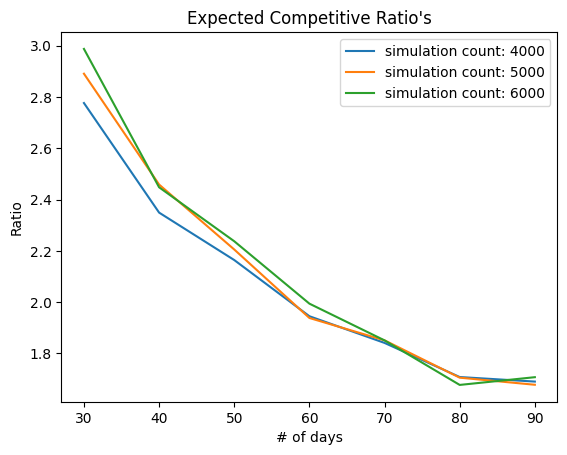

In [5]:
for sim_num in sim_count_list:
    expected_competitive_ratios_list = []
    for days_num in days_count_list:
        expected_competitive_ratios = algorithm_runner(sim_num, days_num)
        expected_competitive_ratios_list.append(expected_competitive_ratios)
        print(f'Number of simulations: {sim_num}, Days skied: {days_num}, Expected Competitive Ratio: {expected_competitive_ratios}')
    plt.plot(days_count_list, expected_competitive_ratios_list, label=f'simulation count: {sim_num}')
plt.title(f"Expected Competitive Ratio's")
plt.xlabel('# of days')
plt.ylabel('Ratio')
plt.legend(loc='best')